# Google Data Analyst Capstone Project
In this project I will create analysis for Bellabeat - a high-tech manufacturer of health-focused products for women.
I will use data "FitBit Fitness Tracker Data" from [https://www.kaggle.com/arashnic/fitbit](https://www.kaggle.com/arashnic/fitbit).

#### Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights I discover will then help guide marketing strategy for the company.

As we can see we have got a lot of data about different measures of activity and health. In this project I will focus only on few of them, namely: 
- dailyActivity_merged,
- hourlyCalories_merged,
- heartrate_seconds_merged,
- hourlyIntensities_merged,
- hourlySteps_merged,
- sleepDay_merged,
- weightLogInfo_merged, because I think from this data we can take out most of informations about our generall health. 

#### 1. I will start from downloading necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

#### 2. Now I will check our data, as I saw before dailyActivity_merged may include the most necessary data.

In [2]:
Activity_mer = pd.read_csv(r"C:/Users/kacpe/Desktop/qq/CS/FitabaseData/dailyActivity_merged.csv")
sleep = pd.read_csv(r"C:/Users/kacpe\Desktop/qq/CS/FitabaseData/sleepDay_merged.csv")
weight = pd.read_csv(r"C:/Users/kacpe\Desktop/qq/CS/FitabaseData/weightLogInfo_merged.csv")

As we can see above, this dataframe includes daily steps, distance, intensity and calories. Now we can import the rest of dataframes.

In [3]:
Activity_mer.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


Checking data

In [6]:
Activity_mer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [8]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [9]:
print("Sleep records:",len(set(sleep["Id"])))
print("Activity records:",  len(set(Activity_mer["Id"])))
print("Weight records:", len(set(weight["Id"])))

Sleep records: 24
Activity records: 33
Weight records: 8


As we can see above in weight table we have got only 8 records and its not enough to make insights so we will not consider this table.

In [10]:
sleep["Date"] = sleep["SleepDay"].str.split().str.get(0)
del sleep["SleepDay"]
sleep.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date
0,1503960366,1,327,346,4/12/2016
1,1503960366,2,384,407,4/13/2016
2,1503960366,1,412,442,4/15/2016
3,1503960366,2,340,367,4/16/2016
4,1503960366,1,700,712,4/17/2016


In [11]:
del Activity_mer["TrackerDistance"]
del Activity_mer["LoggedActivitiesDistance"]
del Activity_mer["SedentaryActiveDistance"]
Activity_mer.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,2.44,0.40,3.91,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863


In [12]:
del sleep["TotalSleepRecords"]
sleep.head()

,Id,TotalMinutesAsleep,TotalTimeInBed,Date
0,1503960366,327,346,4/12/2016
1,1503960366,384,407,4/13/2016
2,1503960366,412,442,4/15/2016
3,1503960366,340,367,4/16/2016
4,1503960366,700,712,4/17/2016


In [13]:
Activity_mer.drop_duplicates(inplace = True)
sleep.drop_duplicates(inplace = True)

In [14]:
merged = Activity_mer.merge(sleep, how = "left", left_on = ["Id","ActivityDate"], right_on = ["Id", "Date"])
merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed,Date
0,1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,327.0,346.0,4/12/2016
1,1503960366,4/13/2016,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,384.0,407.0,4/13/2016
2,1503960366,4/14/2016,10460,6.74,2.44,0.40,3.91,30,11,181,1218,1776,NaN,NaN,NaN
3,1503960366,4/15/2016,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745,412.0,442.0,4/15/2016
4,1503960366,4/16/2016,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863,340.0,367.0,4/16/2016


In [15]:
merged.describe()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,410.000000,410.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,21.164894,13.564894,192.812766,991.210638,2303.609574,419.173171,458.482927
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,32.844803,19.987404,109.174700,301.267437,718.166862,118.635918,127.455140
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,61.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,127.000000,729.750000,1828.500000,361.000000,403.750000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,4.000000,6.000000,199.000000,1057.500000,2134.000000,432.500000,463.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,32.000000,19.000000,264.000000,1229.500000,2793.250000,490.000000,526.000000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,210.000000,143.000000,518.000000,1440.000000,4900.000000,796.000000,961.000000


We can see above that mean SedentaryMinutes is 991, so it have to be decreased.

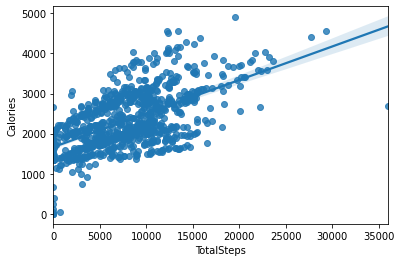

In [16]:
sns.regplot(data = merged, x = 'TotalSteps', y = 'Calories')
plt.show()

We can see correlation between calories and total steps, and it makes sense, because more we walk, more calories will be burned. Application may set daily step goals and send notifications to walk for a moment to burn some calories.

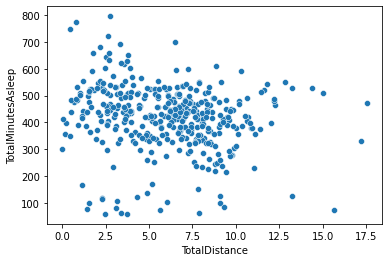

In [17]:
sns.scatterplot(data = merged, y = "TotalMinutesAsleep", x = 'TotalDistance')
plt.show()

We can see that time spent sleeping does not have impact on total distance. What may mean that not active and active persons sleep the same.

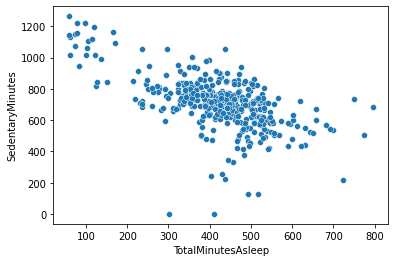

In [18]:
sns.scatterplot(data = merged, x = 'TotalMinutesAsleep', y = 'SedentaryMinutes')
plt.show()

Above we can see negative correletion between minutes asleep and sedentary minutes. Our application may sent notifications to users to stand up or walk for a while (reduce sedentary time) to improve sleep.

Summarizing Bellabit application should be targeted to women working in offices etc. Application may send notification from time to time to stand up and exercise or walk for a few minutes to reduce sedentary time and increase activity to stay healthy.